In [1]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [2]:
# Check for missing values
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [5]:
df['Sleep Disorder'].value_counts()


None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [6]:
df.duplicated().sum()


0

In [7]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')


In [8]:
df[['SYSTOLIC', 'DIASTOLIC']] = df['Blood Pressure'].str.split('/', expand=True)

df['SYSTOLIC'] = df['SYSTOLIC'].astype(float)
df['DIASTOLIC'] = df['DIASTOLIC'].astype(float)

df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0


In [9]:
data = df.copy()

data = data.drop(['Person ID', 'Blood Pressure'], axis=1)

data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126.0,83.0
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


In [10]:
print(df.columns.tolist())


['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder', 'SYSTOLIC', 'DIASTOLIC']


In [11]:
data['BMI Category'] = data['BMI Category'].replace("Normal Weight", "Normal")

data['BMI Category'].value_counts()

Normal        216
Overweight    148
Obese          10
Name: BMI Category, dtype: int64

In [12]:
data['Occupation'].value_counts()


Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [13]:
occupations_to_rename = ['Software Engineer', 'Scientist', 'Sales Representative', 'Manager']

data['Occupation'] = data['Occupation'].replace(occupations_to_rename, 'Others')

data['Occupation'].value_counts()

Nurse          73
Doctor         71
Engineer       63
Lawyer         47
Teacher        40
Accountant     37
Salesperson    32
Others         11
Name: Occupation, dtype: int64

In [14]:
data['Sleep Disorder'].value_counts()


None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [15]:
!pip install imbalanced-learn


In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter


In [17]:
X = df.drop("Sleep Disorder", axis=1)
y = df["Sleep Disorder"]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Encoding categorical columns using LabelEncoder
labelencoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = labelencoder.fit_transform(data[column])

# Separating features and target
X = data.drop('Sleep Disorder', axis=1)
y = data['Sleep Disorder']

# Apply SMOTE for oversampling
smote = SMOTE(random_state=1)
x_resampled, y_resampled = smote.fit_resample(X, y)

In [20]:
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter
import joblib
import os

In [21]:
model = XGBClassifier()

In [22]:
from imblearn.over_sampling import SMOTE

# SMOTE  example
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [23]:
model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib

# Split the resampled dataset (already balanced using SMOTE)
x_train, x_test, y_train, y_test = train_test_split(
    x_resampled, y_resampled, train_size=0.7, test_size=0.3, random_state=4)

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform on training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform test data
x_test_scaled = scaler.transform(x_test)

# Save the fitted scaler for future use (e.g., during deployment)
joblib.dump(scaler, 'minmax_scaler_split.pkl')

# Check the shapes of the resulting arrays
print(f"x_train_scaled shape: {x_train_scaled.shape}")
print(f"x_test_scaled shape: {x_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


x_train_scaled shape: (459, 12)
x_test_scaled shape: (198, 12)
y_train shape: (459,)
y_test shape: (198,)


In [25]:
# 🚀 Initialize and Train Optimized XGBoost Model
model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=1
)

# 🚀 Train the model with balanced data
model.fit(X_resampled, y_resampled)
print("✅ Model training completed successfully!")

✅ Model training completed successfully!


In [26]:
# 🚀 Split data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 🚀 Predict and Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🔍 Model Accuracy: {accuracy * 100:.2f}%\n")
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))


🔍 Model Accuracy: 94.70%

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.96      0.95        52
           2       0.98      0.94      0.96        51

    accuracy                           0.95       132
   macro avg       0.94      0.94      0.94       132
weighted avg       0.95      0.95      0.95       132



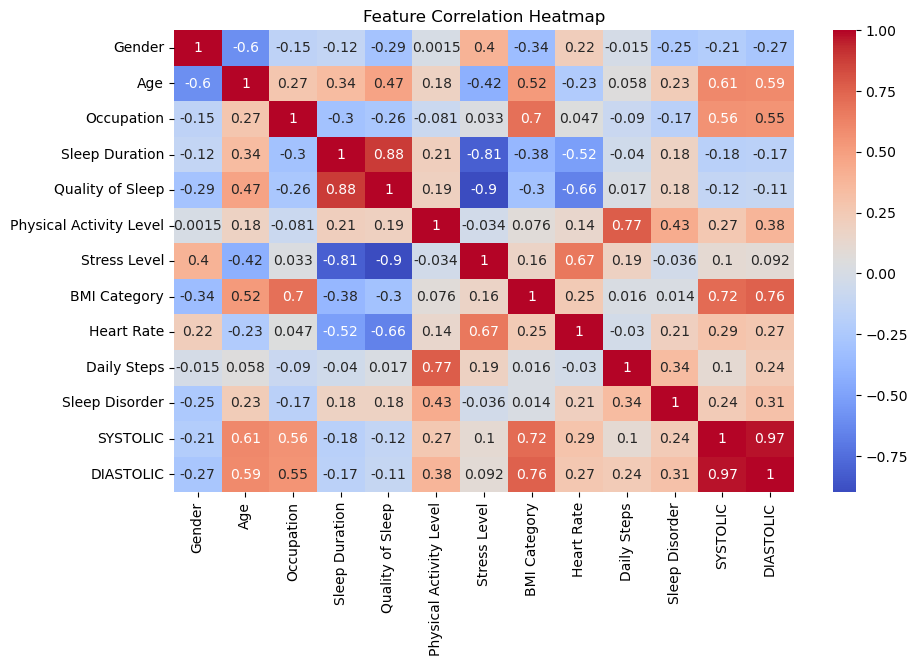

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


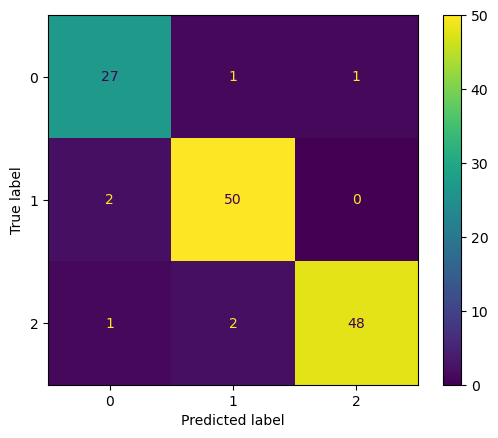

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()


In [29]:
joblib.dump(model, 'xgb_sleep_model.pkl')


['xgb_sleep_model.pkl']

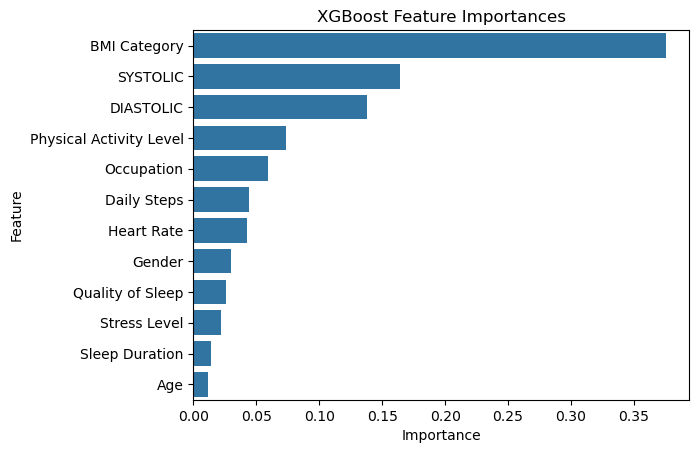

In [30]:
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("XGBoost Feature Importances")
plt.show()


In [31]:
import joblib
import os

# If you haven't scaled already, do this first
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# (Assumes you've already split into X and y properly)

# OPTIONAL: Re-train XGBoost on scaled data if needed
# from xgboost import XGBClassifier
# model = XGBClassifier()
# model.fit(X_scaled, y)

# Save the scaler and model
os.makedirs("model9", exist_ok=True)
joblib.dump(scaler, "model9/scaler9.pkl")
joblib.dump(model, "model9/trained_model9.pkl")

print("✅ XGBoost model and scaler saved to model9/")


✅ XGBoost model and scaler saved to model9/


In [34]:
import pickle
import joblib
import os

# Create a folder to save model and scaler
os.makedirs("model9", exist_ok=True)

# Save the model
with open("model9/trained_model9.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the scaler
joblib.dump(scaler, "model9/scaler9.pkl")

print("✅ Model and scaler saved in 'model8' folder.")


✅ Model and scaler saved in 'model8' folder.


In [32]:
# Example usage
sample = x_test.iloc[[0]]
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)
print(f"Predicted Sleep Disorder: {prediction[0]}")


Predicted Sleep Disorder: 1
